In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# For checking for duplicates row
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Preprocessing

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.86kg,21152.16
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25kg,14119.20
444,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,58554.72
1073,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.49kg,58075.20


In [10]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [11]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


##### ScreenResolution column

In [13]:
# Screen resolution column
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [14]:
df['Ips']=df['ScreenResolution'].apply(lambda y: 1 if 'IPS' in y else 0)
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
989,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.6,59620.32,0,0


In [15]:
temp=df['ScreenResolution'].str.split('x',expand=True)

In [16]:
df['X_res'] = temp[0]
df['Y_res'] = temp[1]

In [17]:
df['X_res']=df['X_res'].str.findall(r'\d+').apply(lambda x:x[0])

In [18]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505.12,0,0,1920,1080


In [19]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [20]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.083832
Y_res          0.552809
Name: Price, dtype: float64

##### CPU Column

In [21]:
df['Processor'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [22]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor
141,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,59461.5456,0,1,1920,1080,Intel Core i5


In [23]:
def get_processor(s):
    if s=="Intel Core i7" or s=="Intel Core i3" or s=="Intel Core i5":
        return s
    else:
        if s.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [24]:
df['Processor'] = df['Processor'].apply(get_processor)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor
75,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,50562.720,0,0,1920,1080,Intel Core i7
1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,61218.720,0,0,1920,1080,Intel Core i7
106,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,22105.872,0,0,1920,1080,Intel Core i3
757,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,83170.080,0,0,1920,1080,Intel Core i7
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,58554.720,0,0,1440,900,Intel Core i5


In [25]:
df.drop(columns=['Cpu'],inplace=True)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5


##### Memory Column

In [27]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [28]:
# Removing .0 from 1.0TB 
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
#replacing Gb with '' and TB with 000 cause we removed .0
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

new = df["Memory"].str.split("+", n = 1, expand = True)

In [29]:
df["first"]= new[0]
df["second"]= new[1]

# Strip removes unwanted whitespaces from begining and ending
df["first"]=df["first"].str.strip()

In [30]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [31]:
# \D removies that string who r not starting with [0-9]
df['first'] = df['first'].str.replace(r'\D', '',regex=True)

df["second"].fillna("0", inplace = True)

In [32]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [33]:
df['second'] = df['second'].str.replace(r'\D', '',regex=True)

In [34]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [35]:
#Total HDD= number    *    1/0        + (Number after +) * 1/0
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [36]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory'],inplace=True)

In [37]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor,HDD,SSD,Hybrid,Flash_Storage
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,8,Intel HD Graphics 620,Windows 10,1.38,57489.120,1,1,1920,1080,Intel Core i7,0,256,0,0
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,8,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.720,1,0,4,2160,Intel Core i5,0,256,0,0
1100,Dell,Ultrabook,12.5,1366x768,4,Intel HD Graphics 520,Windows 7,1.50,60480.792,0,0,1366,768,Intel Core i3,500,0,0,0
157,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,8,Intel HD Graphics 620,Windows 10,1.10,70063.200,1,0,1920,1080,Intel Core i5,0,256,0,0
673,Lenovo,Notebook,15.6,1366x768,4,AMD Radeon R2 Graphics,Windows 10,2.20,18594.720,0,0,1366,768,AMD Processor,0,128,0,0


In [38]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
X_res            0.083832
Y_res            0.552809
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [39]:
#  weak corr with hybrid and flash storage
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [40]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor,HDD,SSD
901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,32,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.12,0,1,1920,1080,Intel Core i7,0,512
708,Lenovo,Notebook,14.0,Full HD 1920x1080,8,Intel HD Graphics 520,Windows 10,1.80,63456.48,0,0,1920,1080,Intel Core i5,0,256
460,Acer,Notebook,15.6,Full HD 1920x1080,4,Nvidia GeForce 940MX,Windows 10,2.23,28984.32,0,0,1920,1080,Intel Core i3,1000,0
298,Lenovo,Notebook,15.6,Full HD 1920x1080,6,AMD Radeon R5 430,Windows 10,2.40,26586.72,0,0,1920,1080,AMD Processor,1000,0


##### GPU Column

In [41]:
df['GPU_Name'] = df['Gpu'].str.split(' ',expand=True)[0]
df['GPU_Name']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: GPU_Name, Length: 1303, dtype: object

In [42]:
df['GPU_Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU_Name, dtype: int64

In [43]:
df[df['GPU_Name']=='ARM']

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor,HDD,SSD,GPU_Name
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,2400,1600,AMD Processor,0,0,ARM


In [44]:
# Deleted one row that having ARM gpu name
df.drop(1191,axis=0,inplace=True)

In [45]:
df[df['GPU_Name']=='ARM']

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Processor,HDD,SSD,GPU_Name


In [46]:
df['GPU_Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU_Name, dtype: int64

In [47]:
df.corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
X_res          0.084590
Y_res          0.554591
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

# Feture Engineering

In [48]:
#  Creating new column Pixels per inches
# sqrt(x^2 + y^2)/inches   ||x,y=> resolution
df['Ppi']=((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

In [49]:
df.corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
X_res          0.084590
Y_res          0.554591
HDD           -0.096891
SSD            0.670660
Ppi            0.350885
Name: Price, dtype: float64

In [50]:
df.drop(columns=['ScreenResolution','X_res','Y_res'],inplace=True)

In [51]:
df.drop(columns=['Inches'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi
1157,Lenovo,Ultrabook,12,Intel HD Graphics 520,Windows 7,1.40,122490.720,0,0,Intel Core i7,0,512,Intel,157.350512
106,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,1.85,22105.872,0,0,Intel Core i3,1000,0,Intel,141.211998
435,Asus,Gaming,8,AMD Radeon RX 580,Windows 10,3.20,90309.600,0,0,AMD Processor,1000,256,AMD,127.335675
891,HP,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,74538.720,1,0,Intel Core i7,0,256,Intel,276.053530
322,Asus,Notebook,8,Intel HD Graphics 620,Windows 10,2.00,58288.320,0,0,Intel Core i7,0,256,Intel,157.350512


In [52]:
df.drop(columns=['Gpu'],inplace=True)
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi
164,Acer,Notebook,4,Windows 10,2.1,18541.4400,0,0,Other Intel Processor,1000,0,Intel,100.454670
1048,Lenovo,Gaming,16,Windows 10,4.6,122010.6672,0,1,Intel Core i7,1000,128,Nvidia,127.335675
963,Toshiba,Ultrabook,8,Windows 10,1.1,95371.2000,1,0,Intel Core i7,0,512,Intel,176.232574
1087,Lenovo,Notebook,8,Windows 7,1.7,63882.7200,0,0,Intel Core i5,0,180,Intel,157.350512


##### OpSys column

In [53]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [54]:
def os_cat(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'Other/Android/Linux'

In [55]:
df['OS'] = df['OpSys'].apply(os_cat)

In [56]:
df.drop(columns='OpSys',inplace=True)
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi,OS
869,Dell,Workstation,8,2.23,94731.8400,0,0,Intel Core i7,1000,0,Nvidia,141.211998,Windows
673,Lenovo,Notebook,4,2.20,18594.7200,0,0,AMD Processor,0,128,AMD,100.454670,Windows
595,Lenovo,Notebook,8,2.29,24455.5200,0,0,Intel Core i3,1000,0,Intel,100.454670,Windows
748,Dell,Notebook,8,1.60,60031.1088,0,0,Intel Core i5,0,256,Intel,111.935204,Windows
904,Lenovo,Notebook,8,1.95,104588.1072,0,1,Intel Core i5,0,512,Intel,141.211998,Windows


In [57]:
df.to_csv('cleaned_Data.csv')

# EDA

C:\Users\comma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

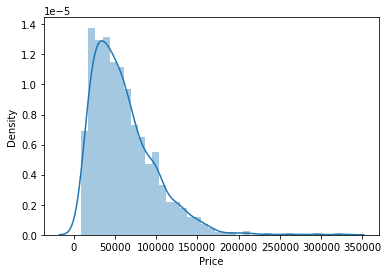

In [58]:
sns.distplot(df['Price'],)

C:\Users\comma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

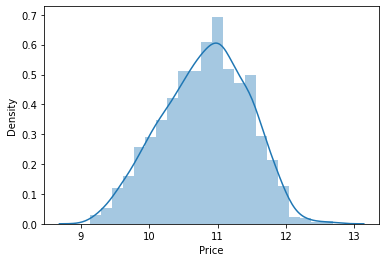

In [59]:
# We r using log on left scewed data and square for right squed data
sns.distplot(np.log(df['Price']))

<AxesSubplot:>

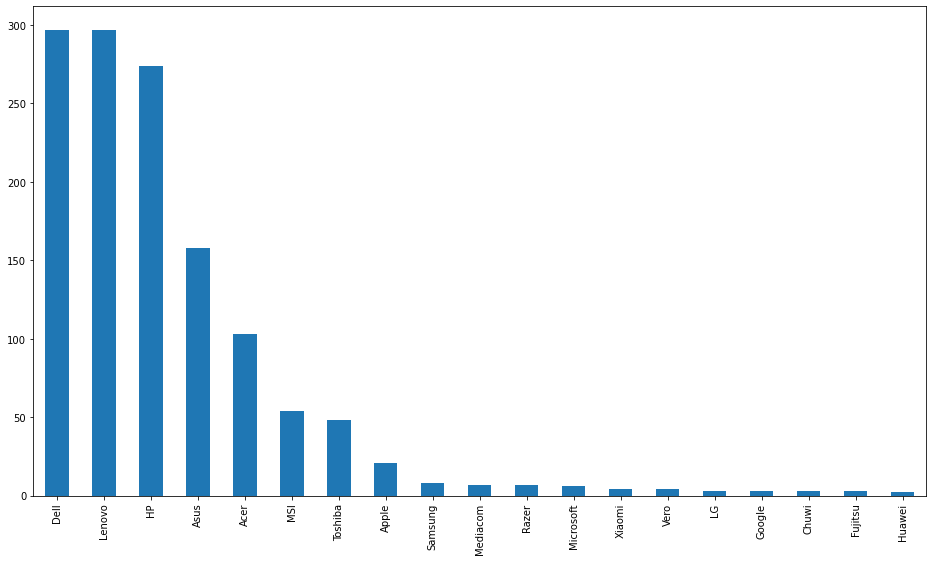

In [60]:
plt.figure(figsize=(16,9))
df['Company'].value_counts().plot(kind='bar')

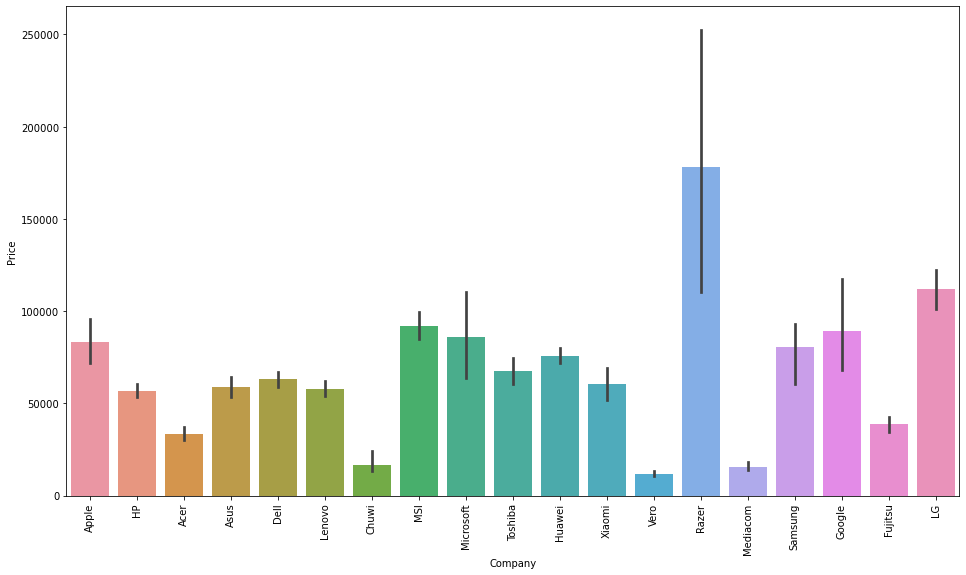

In [61]:
plt.figure(figsize=(16,9))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:>

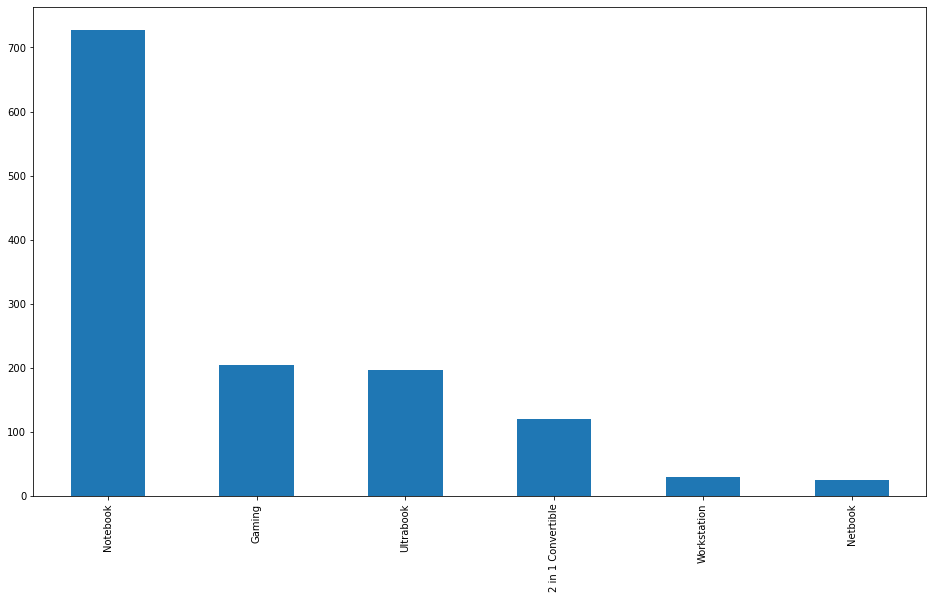

In [62]:
plt.figure(figsize=(16,9))
df['TypeName'].value_counts().plot(kind='bar')

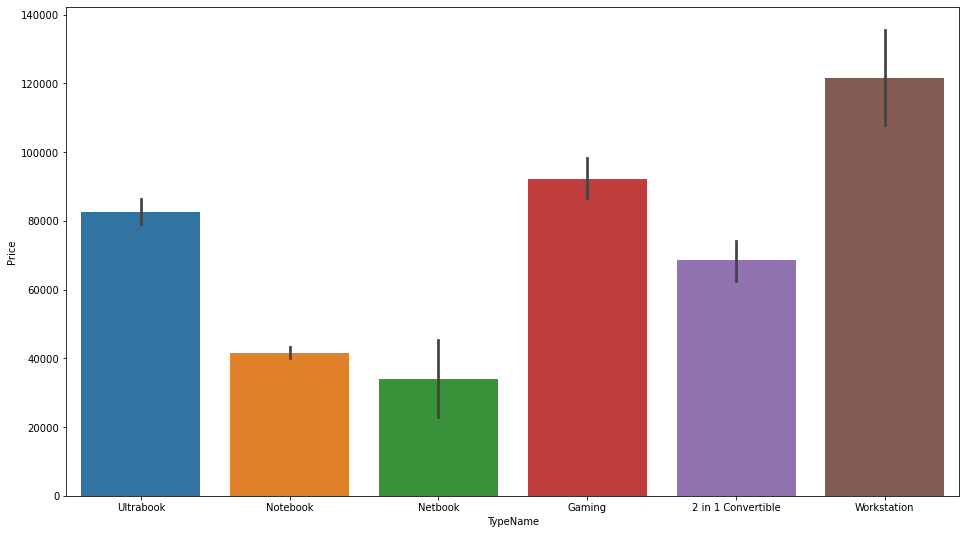

In [63]:
plt.figure(figsize=(16,9))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.show()

<AxesSubplot:>

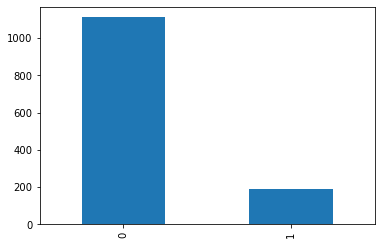

In [64]:
# New created column Touchscreen
df['Touchscreen'].value_counts().plot(kind='bar')

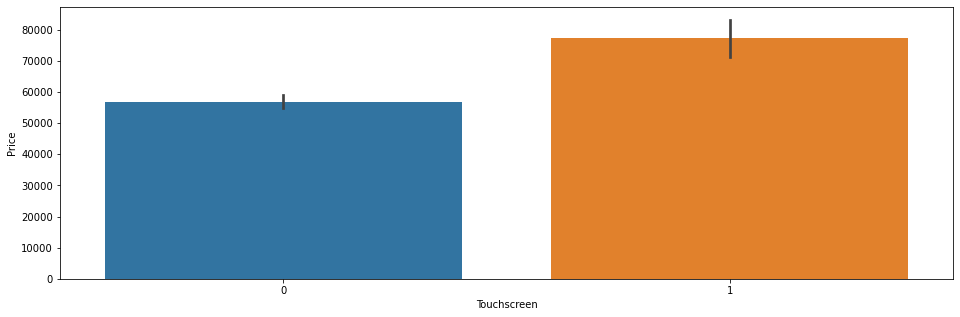

In [65]:
plt.figure(figsize=(16,5))
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.show()

<AxesSubplot:>

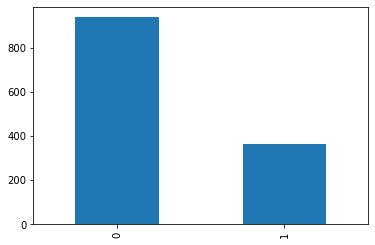

In [66]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

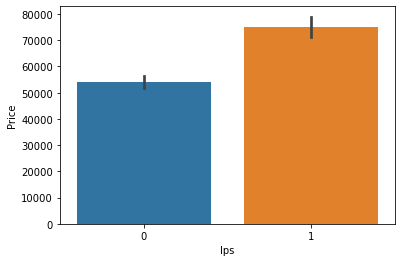

In [67]:
sns.barplot(x=df['Ips'],y=df['Price'])

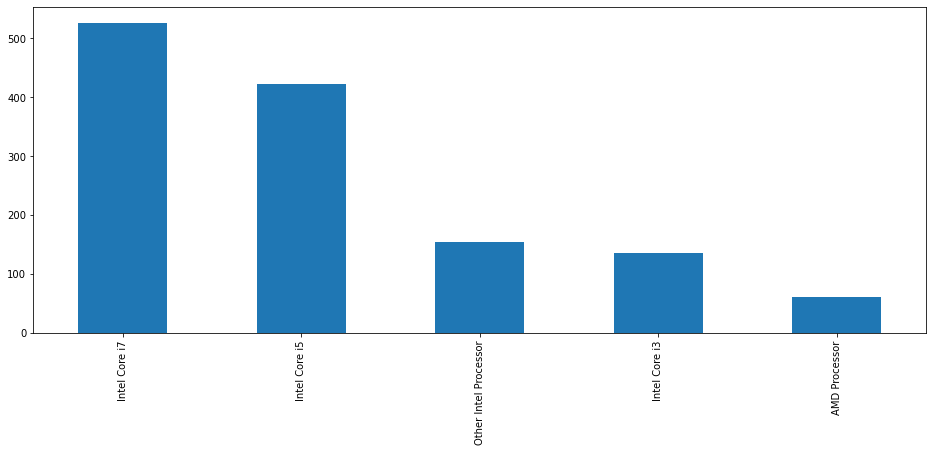

In [68]:
plt.figure(figsize=(16,6))
df['Processor'].value_counts().plot(kind='bar')
plt.show()

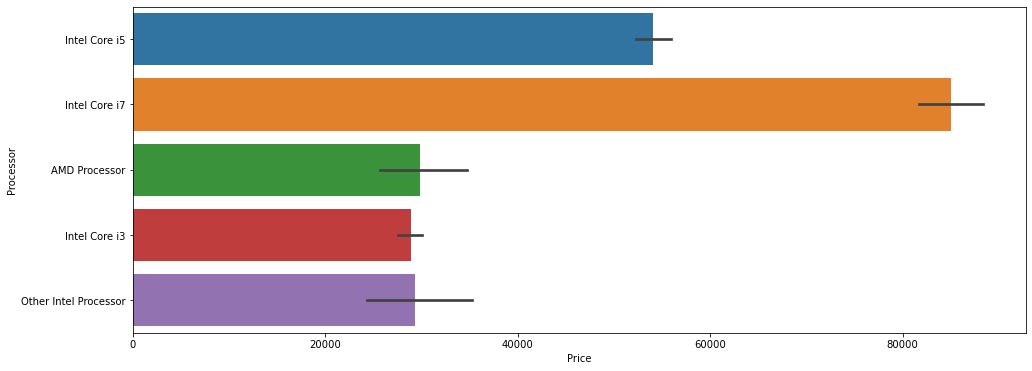

In [69]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Price'],y=df['Processor'])
plt.show()

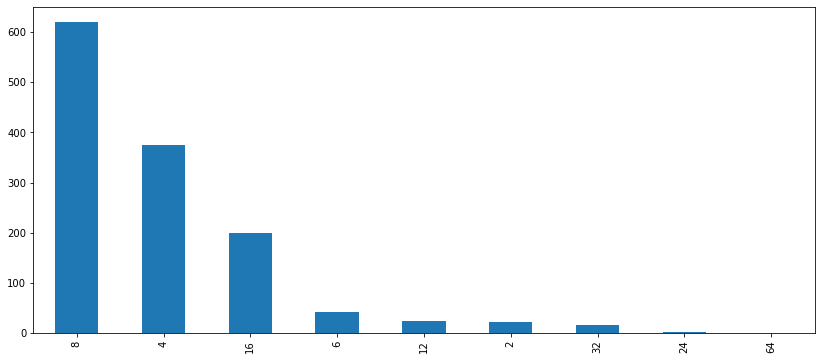

In [70]:
plt.figure(figsize=(14,6))
df['Ram'].value_counts().plot(kind='bar')
plt.show()    

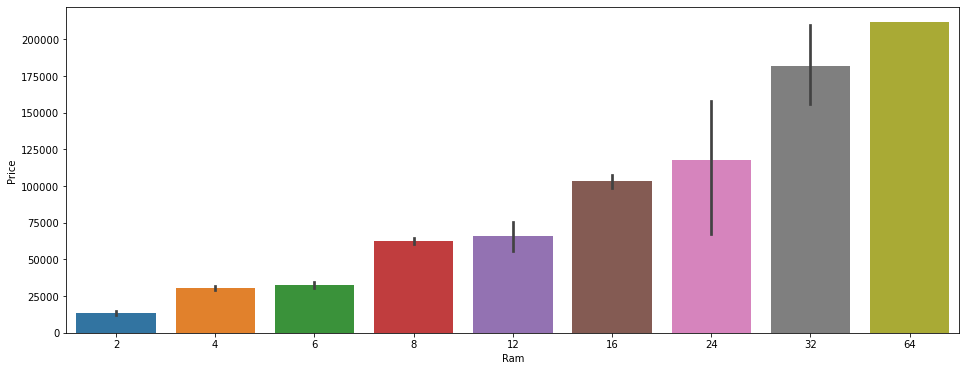

In [71]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

<AxesSubplot:>

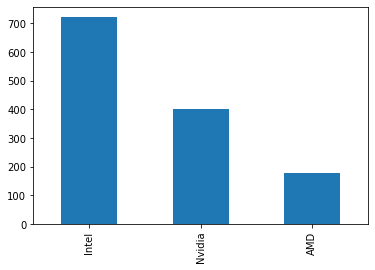

In [72]:
df['GPU_Name'].value_counts().plot(kind='bar')

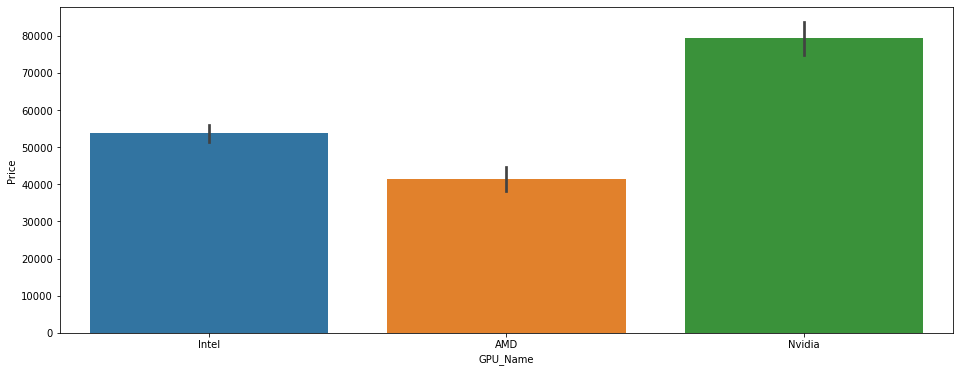

In [73]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['GPU_Name'],y=df['Price'])
plt.show()

In [75]:
# plt.figure(figsize=(16,7))
# sns.barplot(x=df['OpSys'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

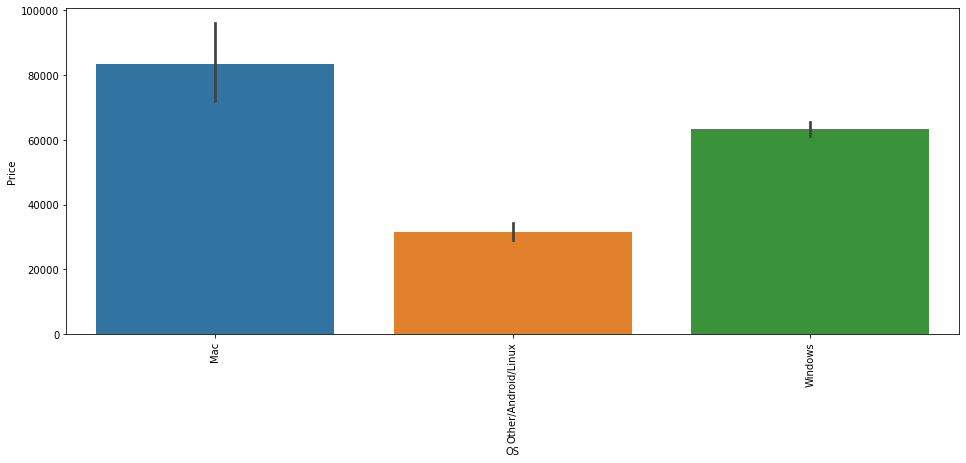

In [76]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\comma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

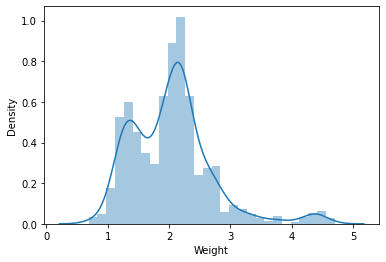

In [77]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

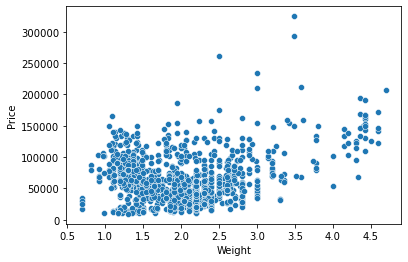

In [78]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

## Heatmap for correlation

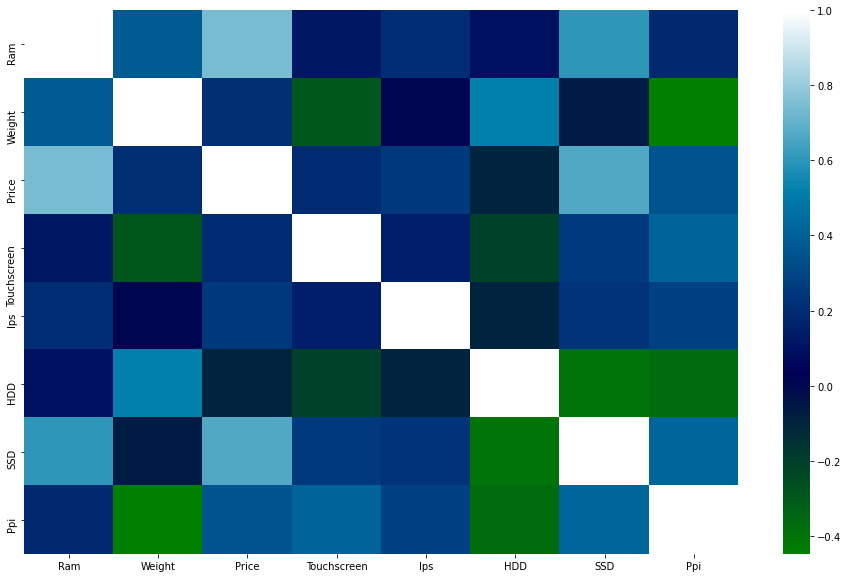

In [79]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='ocean')
plt.show()

# Way to build Model

In [80]:
x=df.drop(columns='Price')
y=np.log(df['Price'])

In [81]:
print(x.shape)
print(y.shape)

(1302, 12)
(1302,)


In [82]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
xtrain

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi,OS
147,Asus,Notebook,4,2.00,0,0,Other Intel Processor,1000,0,Intel,141.211998,Windows
342,HP,Notebook,8,2.10,0,1,Intel Core i3,1000,0,Nvidia,141.211998,Windows
1003,HP,Notebook,4,1.64,0,0,Intel Core i5,500,0,Intel,111.935204,Windows
814,Dell,Notebook,8,2.18,0,0,Intel Core i5,0,256,AMD,141.211998,Windows
344,Dell,Ultrabook,8,1.20,0,0,Intel Core i7,0,256,Intel,165.632118,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,Intel Core i5,1000,256,Nvidia,141.211998,Windows
1130,HP,Notebook,8,2.04,0,0,Intel Core i7,2000,0,Intel,100.454670,Windows
1295,Dell,Notebook,8,2.30,0,0,Intel Core i7,1000,0,AMD,100.454670,Other/Android/Linux
860,Lenovo,Notebook,8,2.30,0,1,Intel Core i5,1000,0,Intel,141.211998,Windows


In [84]:
print('shape of xtrain is : ',xtrain.shape)
print('shape of xtest is : ',xtest.shape)
print('shape of ytrain is : ',ytrain.shape)
print('shape of ytest is : ',ytest.shape)

shape of xtrain is :  (1041, 12)
shape of xtest is :  (261, 12)
shape of ytrain is :  (1041,)
shape of ytest is :  (261,)


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [87]:
step1=ColumnTransformer(transformers=[
    ('ohe1',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,11])    
],remainder='passthrough')

step2=LinearRegression()

In [88]:
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [89]:
from sklearn import set_config
set_config(display='diagram')
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 6, 9, 11])])),
                ('step2', LinearRegression())])

In [90]:
ypred=pipe.predict(xtest)

In [91]:
print('R2 Score : ',r2_score(ytest,ypred))
print('MAE Score : ',mean_absolute_error(ytest,ypred))
# print('Accuracy Score : ',accuracy_score(ytest,ypred))

R2 Score :  0.8052434035839672
MAE Score :  0.21393802696029834


### Random Forest Regressor

In [92]:
step1=ColumnTransformer(transformers=[
    ('ohe1',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,11])    
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.8607956534940142
MAE 0.17653895615436968


# Exporting model

In [93]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipeline.pkl','wb'))

In [94]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,226.983005,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,127.677940,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,141.211998,Other/Android/Linux


In [95]:
xtrain[:5]

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Processor,HDD,SSD,GPU_Name,Ppi,OS
147,Asus,Notebook,4,2.00,0,0,Other Intel Processor,1000,0,Intel,141.211998,Windows
342,HP,Notebook,8,2.10,0,1,Intel Core i3,1000,0,Nvidia,141.211998,Windows
1003,HP,Notebook,4,1.64,0,0,Intel Core i5,500,0,Intel,111.935204,Windows
814,Dell,Notebook,8,2.18,0,0,Intel Core i5,0,256,AMD,141.211998,Windows
344,Dell,Ultrabook,8,1.20,0,0,Intel Core i7,0,256,Intel,165.632118,Windows
